In [1]:
import cv2 
cap = cv2.VideoCapture(0)
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
while cap.isOpened():
    ret, frame2 = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    frame_diff = cv2.absdiff(prev_gray, gray)
    _, thresh = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow('Motion Detection', frame2)
    prev_gray = gray.copy()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

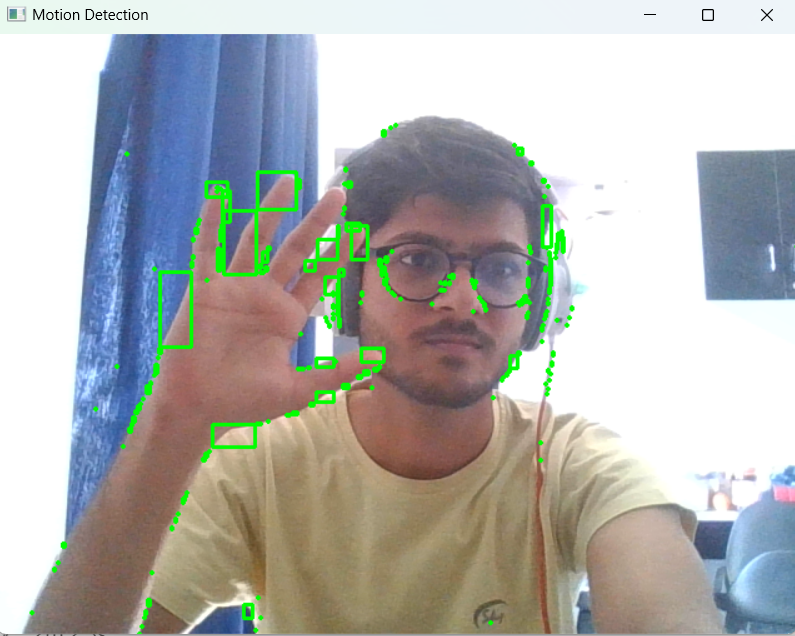